In [1]:
#import the dependencies
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

We have two different datasets from Kaggle - the training and test sets. We will be using the training set to help build a predictive model and the testing set will score the training and help to create an output file that we will submit onto the Kaggle evaluation.

We will be loading the training set in the following steps.

In [2]:
data = pd.read_csv('./resources/train.csv')

In [3]:
print(data.shape)

(891, 12)


We print the data.shape:
891 rows &
12 columns

This helps to identify how many rows and columns are in the set of data

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, 0 = Dead. The is the variable we're going to predict.

The other variables describe the passengers. They are the features.

- PassengerId: id given to each traveler on the boat
- Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
- Name of the passeger
- Gender
- Age
- SibSp: number of siblings and/or spouses traveling with the passenger
- Parch: number of parents and/or children traveling with the passenger
- Ticket number
- Ticket Fare
- Cabin number
- Embarkation = This describe three possible areas of the Titanic from which the people embark (3 possible locations: Cherbourg, Queenstown, & Southampton)


Pandas allows you to a have a high-level simple statistical description of the numerical features. This can be done using the describe method.

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

One solution is to fill in the null values with the median age - we could have imputed the average (mean) age but the median is more resistant to outliers.

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Survival Based on Gender

In [8]:
data['Died'] = 1 - data['Survived']

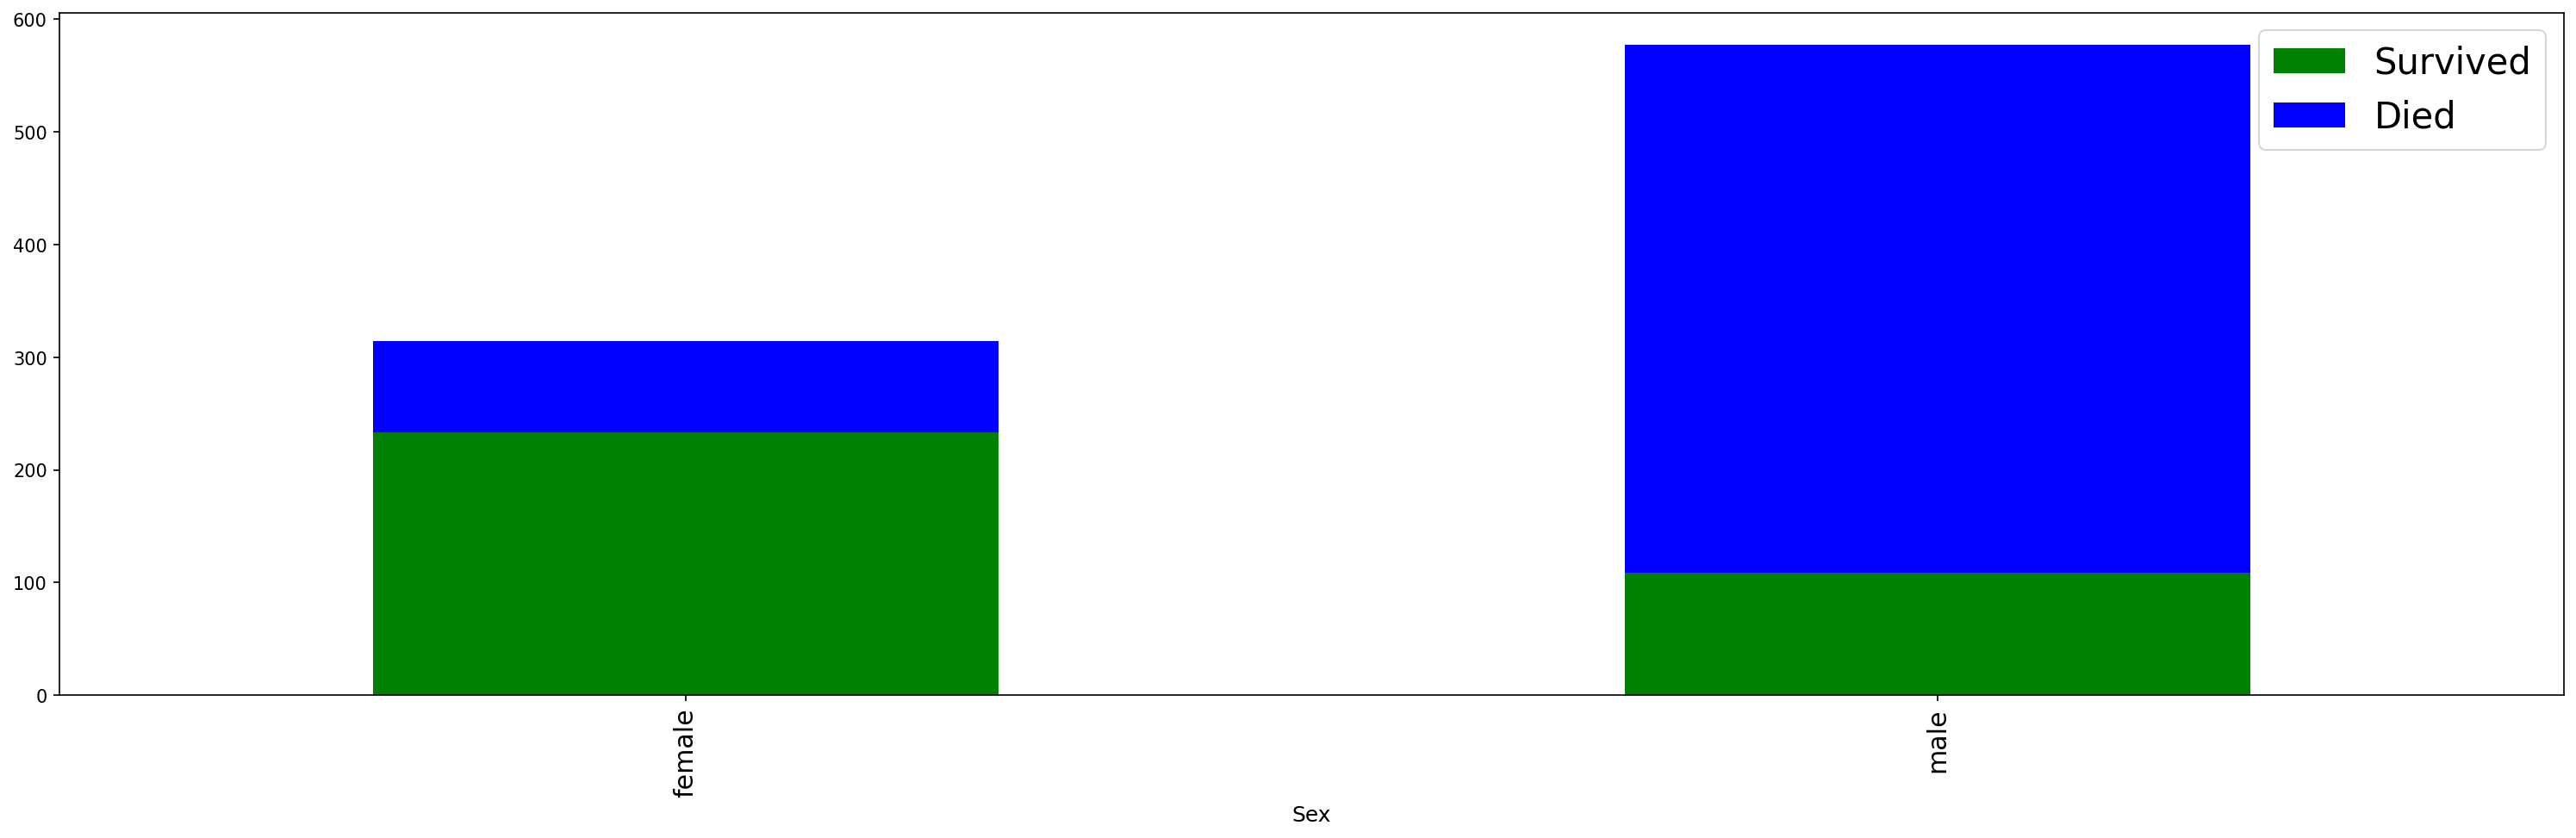

In [12]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['g', 'b']);

Male passengers were more likely to die than female passengers.

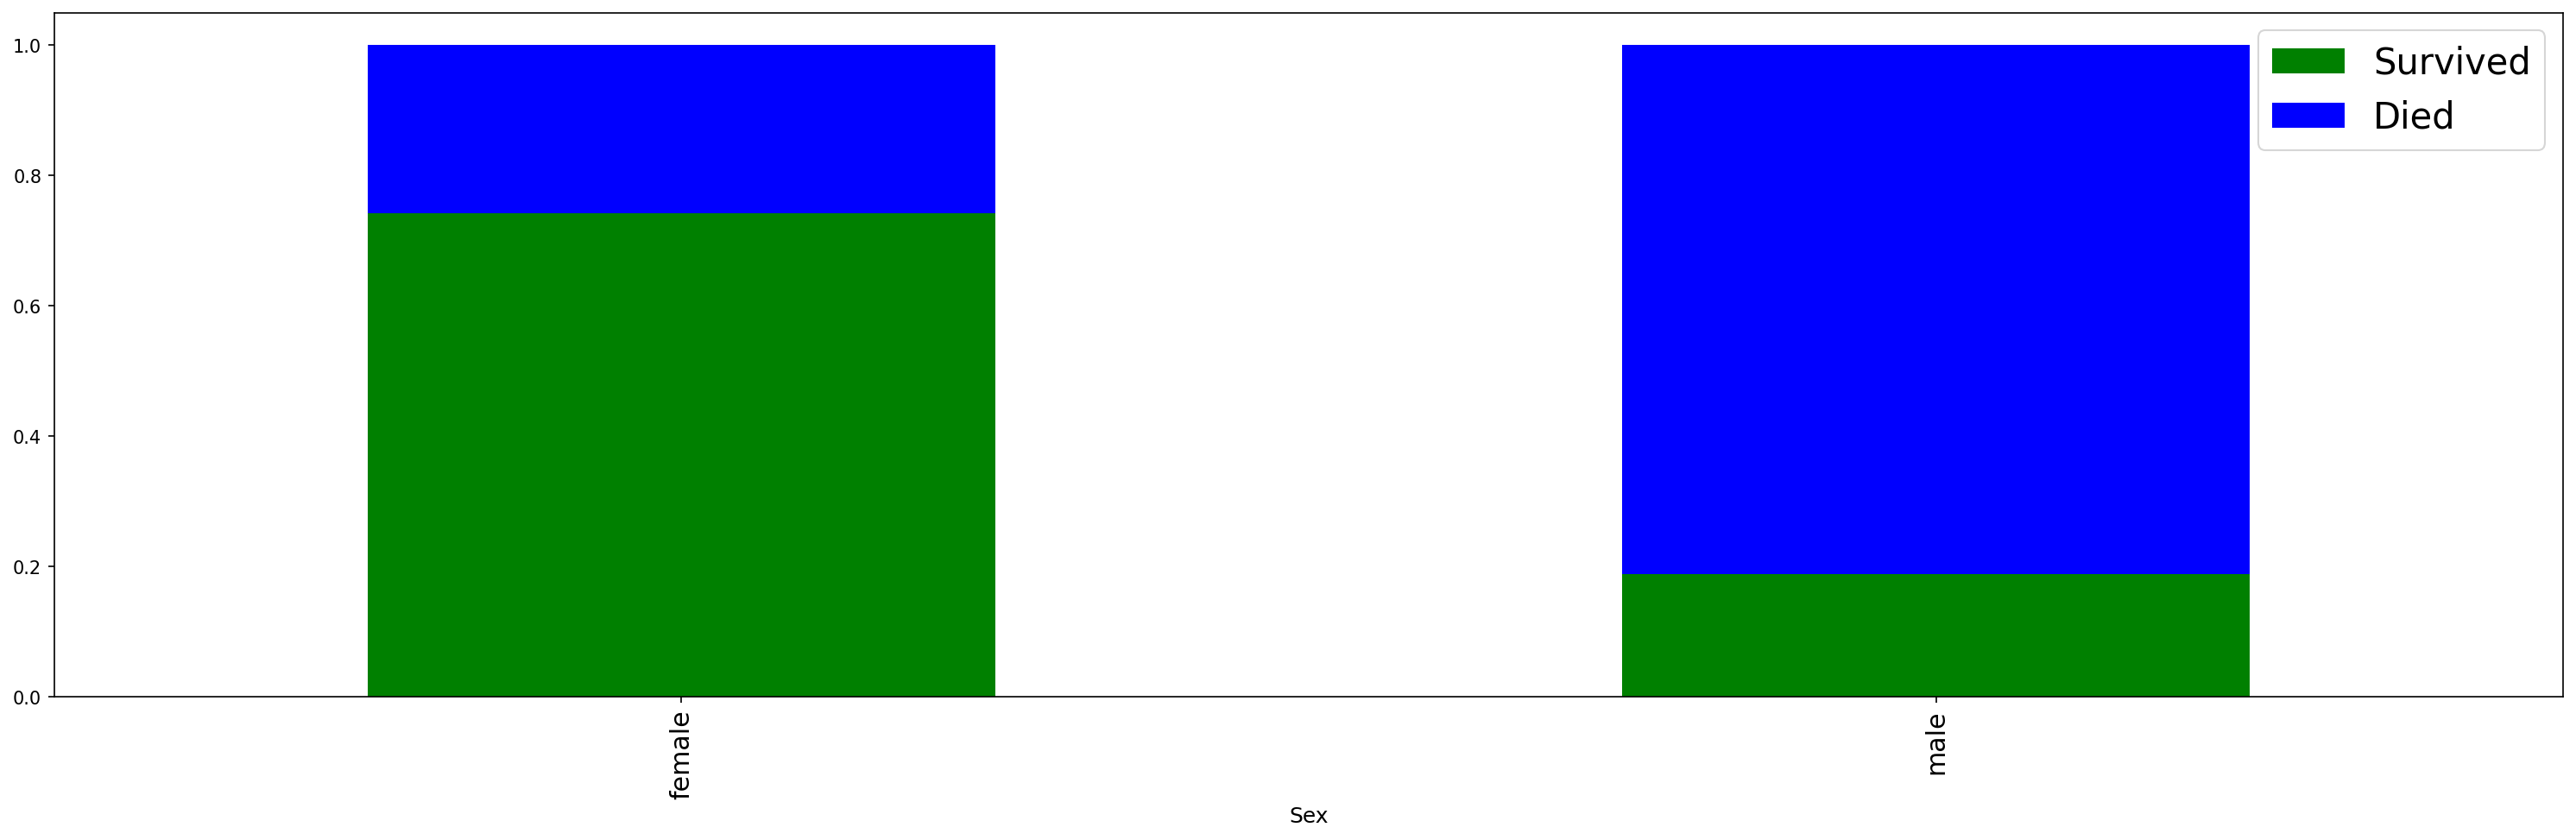

In [13]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color=['g', 'b']);

Gender was the variable that seems to be a discriminative feature. Women were more likely to survive.

Let's now correlate the survival with the age variable.

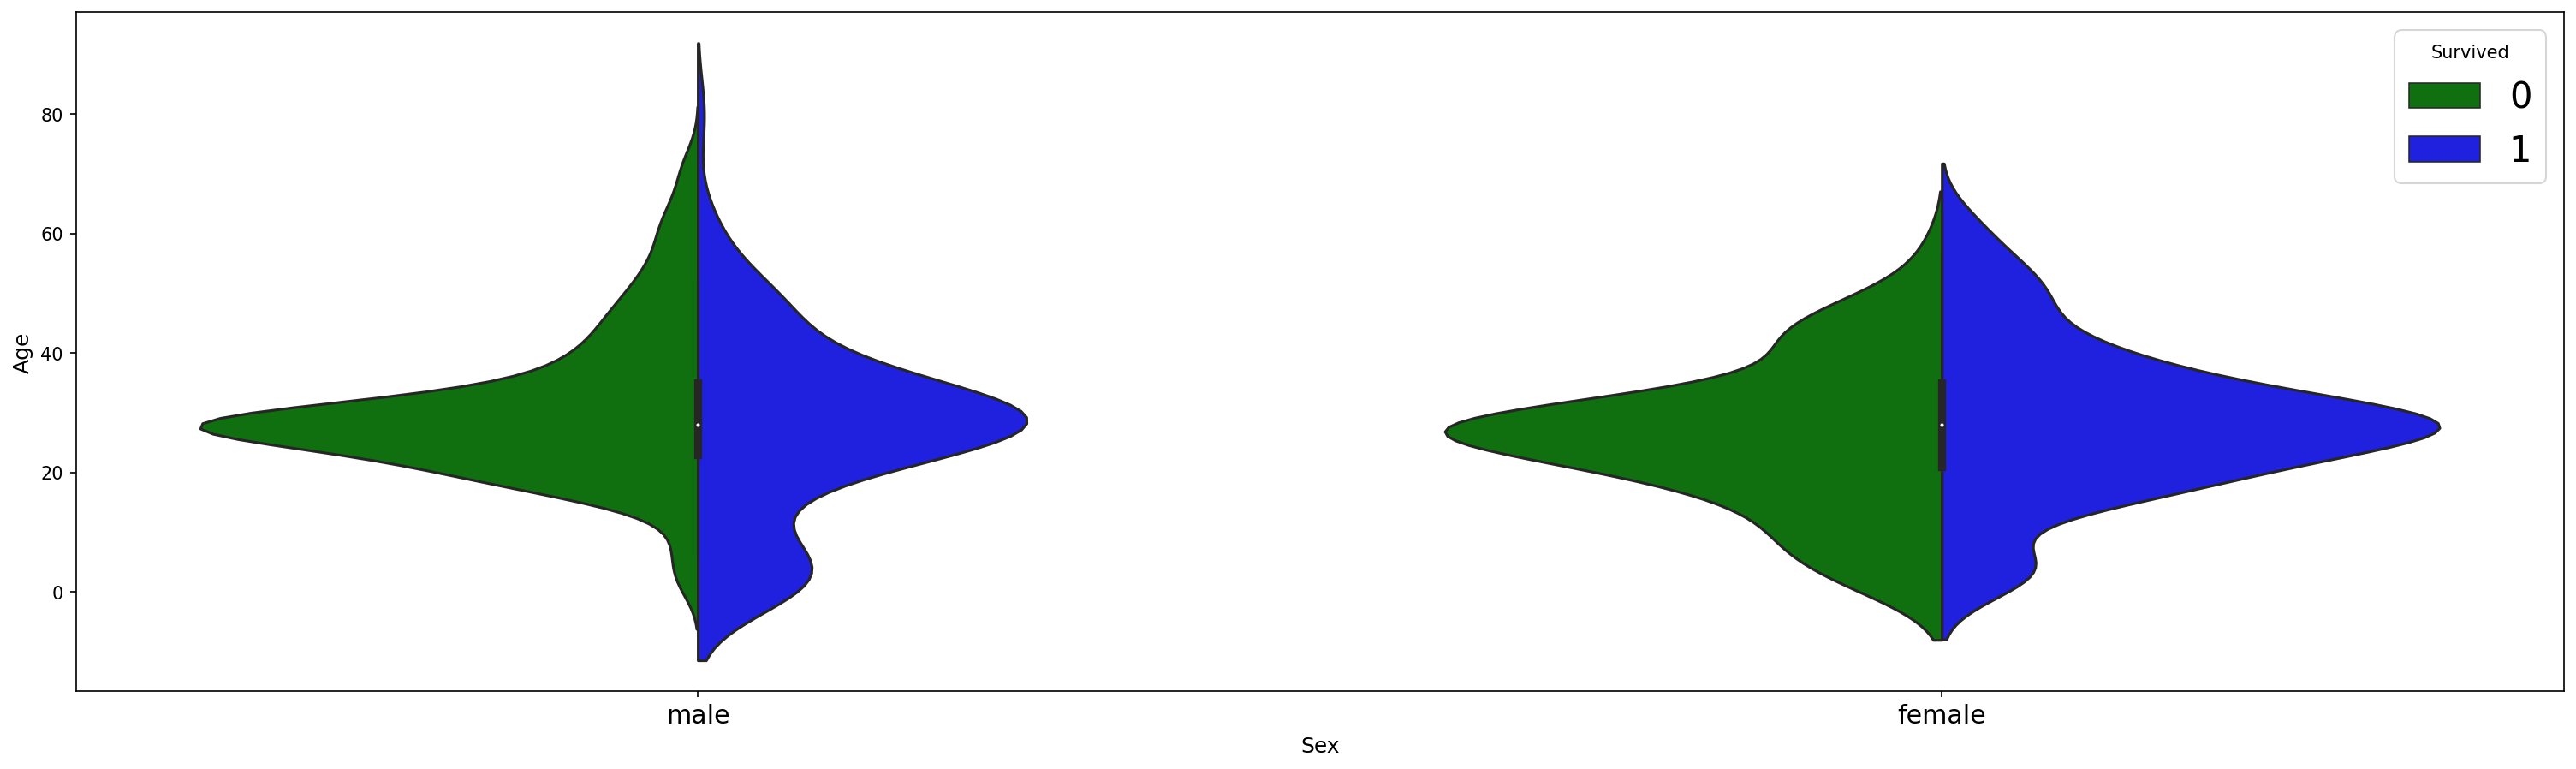

In [14]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "g", 1: "b"}
              );

As we saw in the chart above and validate by the following:

- Women survive more than men, as depicted by the larger female green histogram

Now, we see that:

- The age conditions the survival for male passengers:
- Younger males had a higher likelihood to survive
- A large number of passengers between 20 and 40 died
- Age doesn't seem to have a direct impact on the female survival

## Let's now focus on the Fare ticket of each passenger and see how it could impact the survival.

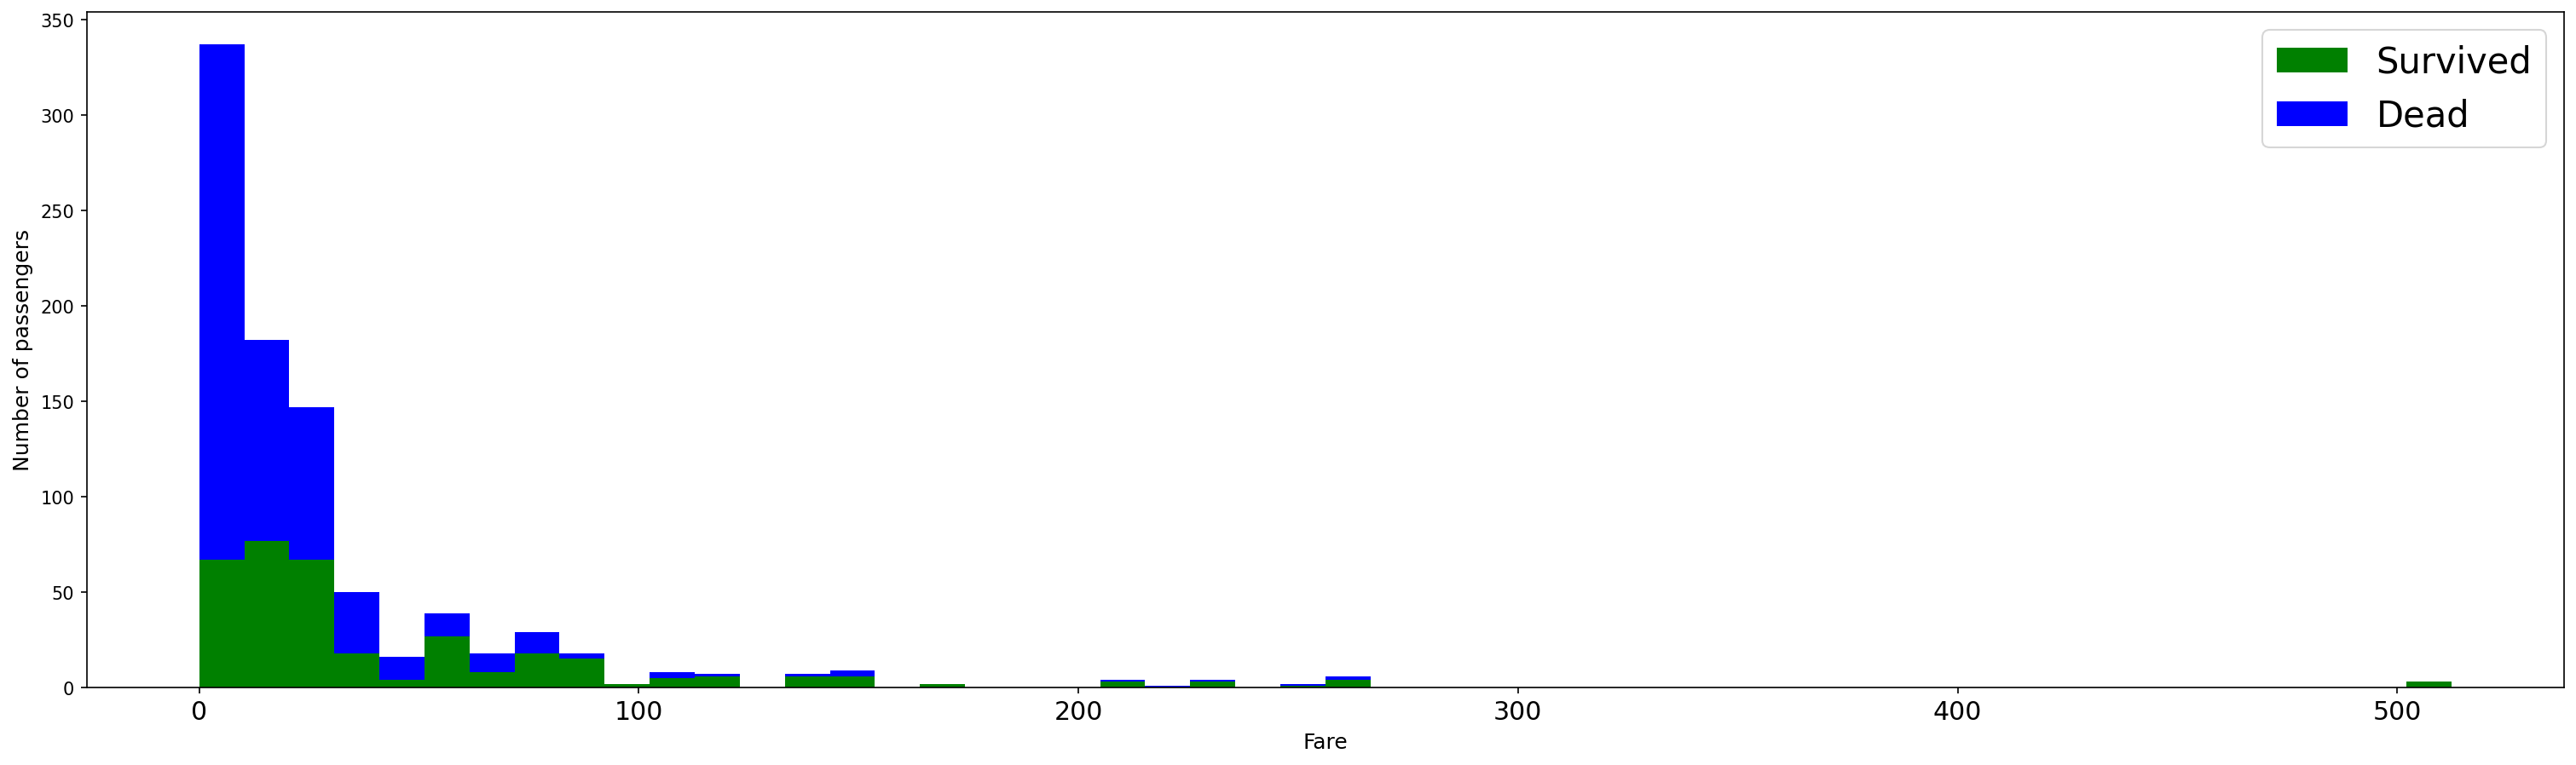

In [15]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','b'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Passengers with cheaper ticket fares were more likely to die.

Passengers with the more expensive tickets, and therefore a higher class status (1st or 2nd), seemed to be rescued first.

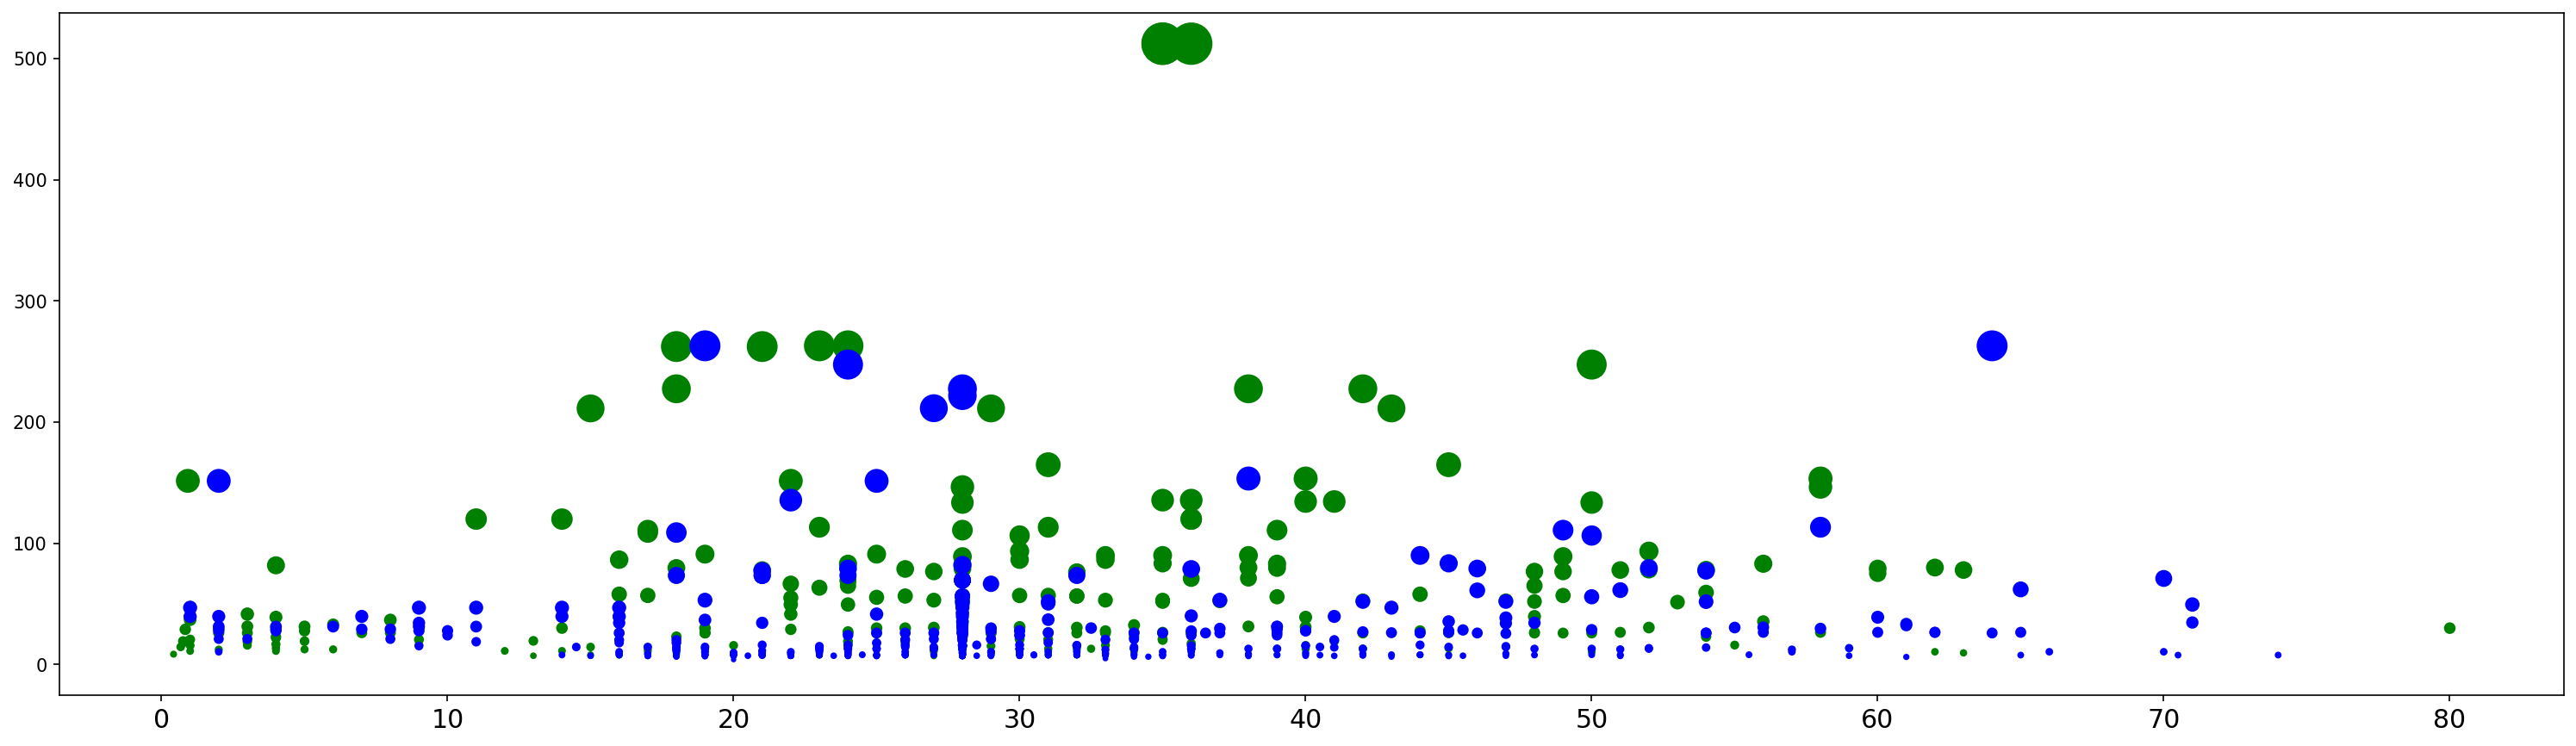

In [16]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='blue', s=data[data['Survived'] == 0]['Fare']);

The size of the circles is proportional to the ticket fare.

On the x-axis, we have the ages and the y-axis, we consider the ticket fare.

We can observe different clusters:

- Large green dots between x=20 and x=45: adults with the largest ticket fares
- Small blue dots between x=10 and x=45, adults from lower classes on the boat
- Small green dots between x=0 and x=7: these are the children that were saved

As a matter of fact, the ticket fare correlates with the class as we see it in the chart below.

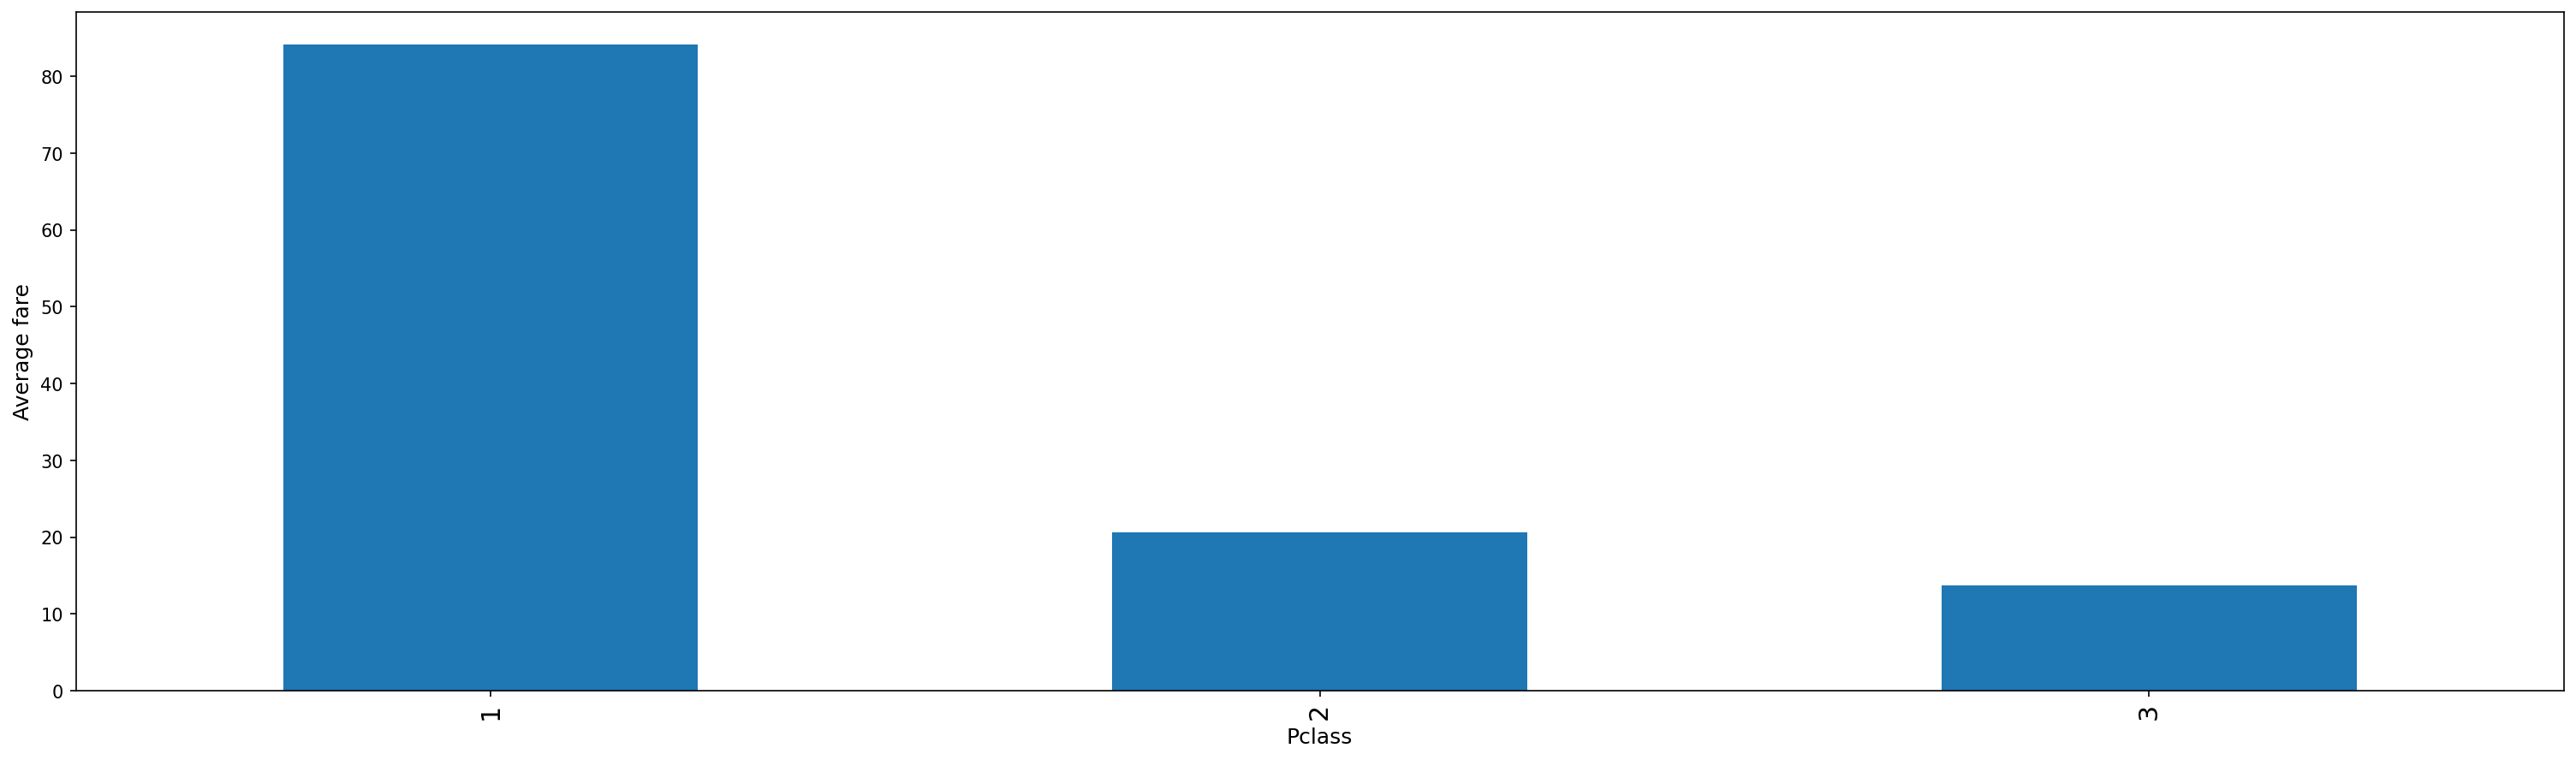

In [17]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

## Embarkation Site Impact On Survival

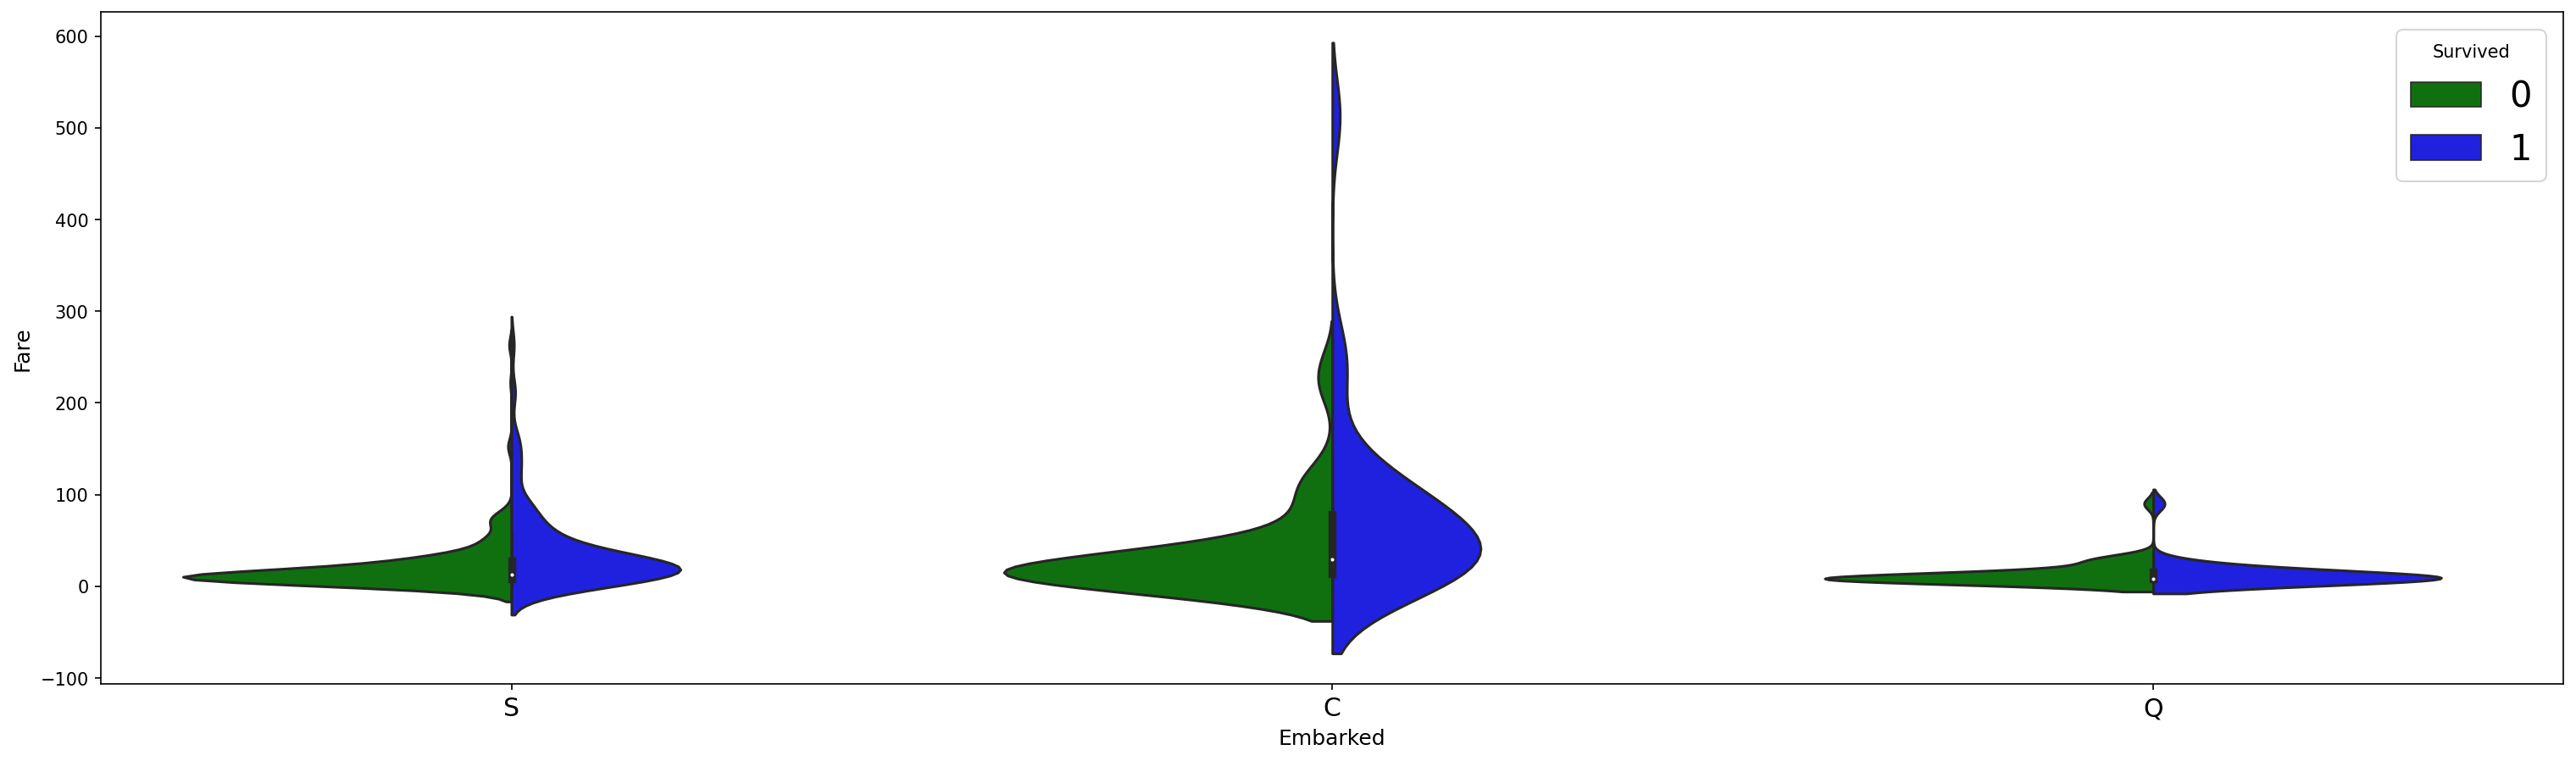

In [18]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "g", 1: "b"});

It seems that the embarkation Cherbourg (C) had a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive.

We also see this happening in embarkation Southampton (S) and less in embarkation Queenstown (Q).

In [19]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./resources/train.csv')
    
    # reading test data
    test = pd.read_csv('./resources/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [20]:
combined = get_combined_data()

In [21]:
print(combined.shape)

(1309, 10)


By printing combined - we are able to tell that the merge of the two datasets was succesful. 

In [22]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Extracting the passenger titles

If you look closely at these first examples:

- Braund, Mr. Owen Harris
- Heikkinen, Miss. Laina
- Oliva y Ocana, Dona. Fermina
- Peter, Master. Michael J

You will notice that each name has a title in it ! This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. In that case, we might introduce an additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

In [23]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [24]:
print(titles)

{'Mme', 'Sir', 'Mrs', 'Col', 'Rev', 'Mr', 'Dr', 'Miss', 'Don', 'Ms', 'Major', 'Lady', 'Mlle', 'Capt', 'the Countess', 'Jonkheer', 'Master'}


In [25]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

The function above parses the names and extracts the titles. Then, it maps the titles to categories of titles. We selected :

- Officer
- Royalty
- Mr.
- Mrs.
- Miss
- Master

In [27]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


### Age 

In [30]:
print(combined.iloc[:891].Age.isnull().sum())

177


In [31]:
print(combined.iloc[891:].Age.isnull().sum())

86


In [32]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]


In [33]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


This small DataFrame helped us understand and input the missing age values based on different criteria.

If we looked at the meidan age column and saw that the value can be different alongside the gender, Pclass, and Title

#### For Example:

- If the passenger is a female and is from Pclass 1 and Royalty = her average age is approximately 40-41

- If the passenger is a male and is from Pclass 3 with a Mr title = his average age is approximately 26

In [38]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [50]:
def process_names():
    global combined
    # we clean the Name variable
    combined2 = combined.copy()
    combined2.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined2.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined2

We removed the column for Name as this won't be important since we now have a Title column for an identifier for the passengers.

In [51]:
combined = process_names()

AttributeError: 'function' object has no attribute 'copy'